# SVM classification with Python

We'll try to use SVM to create a model that directly predicts weather a customer is going to purchase a product or not based on the age and estimated saraly.

Let's grab it and use it!

## Import Libraries

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

## Get the Data

In [16]:
df = pd.read_csv('Social_Network_Ads.csv')

In [17]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


## Check for null values

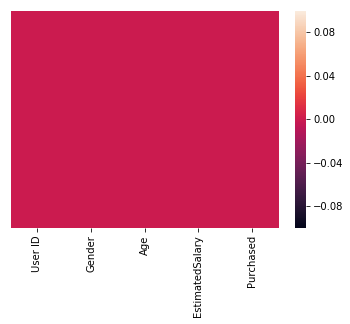

In [9]:
sns.heatmap(df.isnull(),yticklabels=False)

## Check correlation

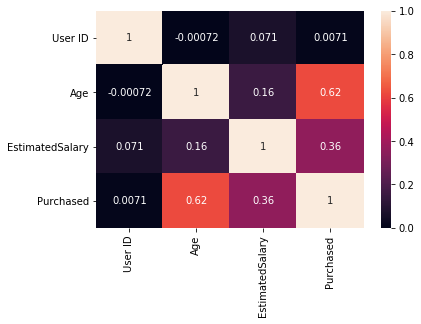

In [18]:
sns.heatmap(df.corr(),annot=True)

converting 'Gender' column into number form to convert the data into useful form

In [19]:
df['new_gender'] = pd.get_dummies( df['Gender'],drop_first=True)

In [20]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,new_gender
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


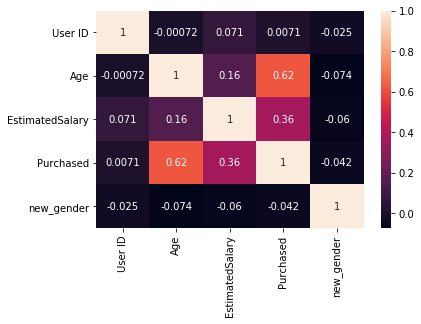

In [21]:
sns.heatmap(df.corr(),annot=True)

we can see 'Purchased' and 'new_gender' column do not co-relate and affect more on the target column, hence drop 'Gender','new_gender','User ID'

In [24]:
df.drop(['Gender','new_gender','User ID'],axis=1,inplace=True)

In [26]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Standardize the Variables

Because the SVM classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the SVM classifier, than variables that are on a small scale.

In [27]:
from sklearn.preprocessing import StandardScaler

In [29]:
scalar = StandardScaler()

In [30]:
scalar.fit(df.drop('Purchased',axis=1))

C:\Users\Pradip\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
scaled_array = scalar.transform(df.drop('Purchased',axis=1))

C:\Users\Pradip\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [34]:
new_df = pd.DataFrame(columns=df.columns[:-1],data=scaled_array)
new_df.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


## Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
(X_train, X_test, y_train, y_test) = train_test_split(new_df,df['Purchased'],test_size =0.3)

## Using SVM

In [37]:
from sklearn.svm import SVC
cl = SVC()

In [38]:
cl.fit(X_train,y_train)

C:\Users\Pradip\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [39]:
ypred = cl.predict(X_test)

## Predictions and Evaluations

Let's evaluate our decision tree model!

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(ypred,y_test)

array([[67,  5],
       [ 4, 44]], dtype=int64)